In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd 
import geopandas as gpd
from glob import glob
import matplotlib.pyplot as plt 
import seaborn as sns
import altair as alt
import plotly.express as px
import numpy as np

In [3]:
sf_data = pd.read_csv('/Users/florence/Desktop/sf_data_with_greenspace_flag.csv', index_col=0)
sf_data.head()

,observed_on_string,time_observed_at,created_time_zone,created_at,updated_at,description,user_id,user_login,quality_grade,reviewed_by,...,taxon_parent_id,taxon_native,taxon_endemic,taxon_threatened,taxon_search_rank,taxon_observations,identifications,challenge,geometry,greenspace_flag
id,,,,,,,,,,,,,,,,,,,,,
5677489,Thu Apr 13 2017 12:40:50 GMT-0700 (PDT),2017-04-13T12:40:50-07:00,America/Los_Angeles,2017-04-13T13:29:41-07:00,2018-11-26T12:33:26-08:00,NaN,8778,gyrrlfalcon,needs_id,"[8778, 275891, 425620]",...,49025,False,False,False,127627,127627,"[{'user_id': 8778, 'category': 'maverick', 'di...",../../data/CNC_San_Francisco_2017,POINT (-122.0761311707 37.4218688719),0
5682279,Thu Apr 13 2017 15:57:53 GMT-0700 (PDT),2017-04-13T15:57:53-07:00,America/Los_Angeles,2017-04-13T18:37:08-07:00,2018-11-26T06:03:56-08:00,NaN,4797,paranger,research,"[4797, 179103, 425620]",...,48245,True,False,False,8756,8756,"[{'user_id': 179103, 'category': 'supporting',...",../../data/CNC_San_Francisco_2017,POINT (-122.1808033333 37.3537033333),0
5682371,Thu Apr 13 2017 16:08:07 GMT-0700 (PDT),2017-04-13T16:08:07-07:00,America/Los_Angeles,2017-04-13T18:44:41-07:00,2018-11-26T06:03:57-08:00,NaN,4797,paranger,research,"[4797, 179103, 425620]",...,48245,True,False,False,8756,8756,"[{'user_id': 179103, 'category': 'supporting',...",../../data/CNC_San_Francisco_2017,POINT (-122.180405 37.35305),0
5684642,2017/04/14 12:13 AM PDT,2017-04-14T00:13:00-07:00,America/Los_Angeles,2017-04-14T00:20:21-07:00,2017-04-21T14:58:31-07:00,NaN,1,kueda,needs_id,"[1, 425620]",...,55518,False,False,False,6696,6696,"[{'user_id': 1, 'category': None, 'disagreemen...",../../data/CNC_San_Francisco_2017,POINT (-122.3743439385 37.8911209653),0
5684660,Fri Apr 14 2017 00:28:12 GMT-0700 (PDT),2017-04-14T00:28:12-07:00,America/Los_Angeles,2017-04-14T00:29:36-07:00,2020-02-15T14:31:49-08:00,NaN,3494,damontighe,needs_id,"[3494, 179103, 212655, 425620, 477431]",...,67740,False,False,False,1246,1246,"[{'user_id': 3494, 'category': 'leading', 'dis...",../../data/CNC_San_Francisco_2017,POINT (-122.2654333333 37.80403),0


In [4]:
sf_data.greenspace_flag.value_counts()

0    97978
1    41060
Name: greenspace_flag, dtype: int64

In [8]:
sf_data.head()

,observed_on_string,time_observed_at,created_time_zone,created_at,updated_at,description,user_id,user_login,quality_grade,reviewed_by,...,taxon_native,taxon_endemic,taxon_threatened,taxon_search_rank,taxon_observations,identifications,challenge,geometry,greenspace_flag,observed_on
id,,,,,,,,,,,,,,,,,,,,,
5677489,Thu Apr 13 2017 12:40:50 GMT-0700 (PDT),2017-04-13 12:40:50-07:00,America/Los_Angeles,2017-04-13T13:29:41-07:00,2018-11-26T12:33:26-08:00,NaN,8778,gyrrlfalcon,needs_id,"[8778, 275891, 425620]",...,False,False,False,127627,127627,"[{'user_id': 8778, 'category': 'maverick', 'di...",../../data/CNC_San_Francisco_2017,POINT (-122.0761311707 37.4218688719),0,2017-04-13 12:40:50-07:00
5682279,Thu Apr 13 2017 15:57:53 GMT-0700 (PDT),2017-04-13 15:57:53-07:00,America/Los_Angeles,2017-04-13T18:37:08-07:00,2018-11-26T06:03:56-08:00,NaN,4797,paranger,research,"[4797, 179103, 425620]",...,True,False,False,8756,8756,"[{'user_id': 179103, 'category': 'supporting',...",../../data/CNC_San_Francisco_2017,POINT (-122.1808033333 37.3537033333),0,2017-04-13 15:57:53-07:00
5682371,Thu Apr 13 2017 16:08:07 GMT-0700 (PDT),2017-04-13 16:08:07-07:00,America/Los_Angeles,2017-04-13T18:44:41-07:00,2018-11-26T06:03:57-08:00,NaN,4797,paranger,research,"[4797, 179103, 425620]",...,True,False,False,8756,8756,"[{'user_id': 179103, 'category': 'supporting',...",../../data/CNC_San_Francisco_2017,POINT (-122.180405 37.35305),0,2017-04-13 16:08:07-07:00
5684642,2017/04/14 12:13 AM PDT,2017-04-14 00:13:00-07:00,America/Los_Angeles,2017-04-14T00:20:21-07:00,2017-04-21T14:58:31-07:00,NaN,1,kueda,needs_id,"[1, 425620]",...,False,False,False,6696,6696,"[{'user_id': 1, 'category': None, 'disagreemen...",../../data/CNC_San_Francisco_2017,POINT (-122.3743439385 37.8911209653),0,2017-04-14 00:13:00-07:00
5684660,Fri Apr 14 2017 00:28:12 GMT-0700 (PDT),2017-04-14 00:28:12-07:00,America/Los_Angeles,2017-04-14T00:29:36-07:00,2020-02-15T14:31:49-08:00,NaN,3494,damontighe,needs_id,"[3494, 179103, 212655, 425620, 477431]",...,False,False,False,1246,1246,"[{'user_id': 3494, 'category': 'leading', 'dis...",../../data/CNC_San_Francisco_2017,POINT (-122.2654333333 37.80403),0,2017-04-14 00:28:12-07:00


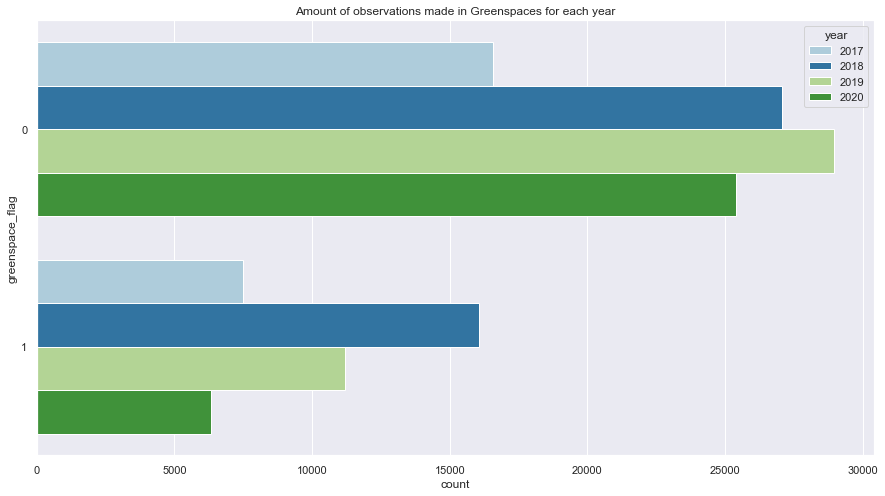

In [10]:
sf_data['time_observed_at'] = pd.to_datetime(sf_data['time_observed_at'], utc=True)
sf_data['year'] = pd.DatetimeIndex(sf_data['time_observed_at']).year
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.title('Amount of observations made in Greenspaces for each year')
ax = sns.countplot(y="greenspace_flag", hue="year", data=sf_data, palette='Paired')

In [11]:
sf_2018 = sf_data[sf_data.year == 2018]
# select the top-20 users: 
ranks = sf_2018.groupby('user_login').count()['year'].to_frame()
ranks.rename(columns={'year':'num_obsverations'}, inplace=True)
ranks.head()

,num_obsverations
user_login,
_claytonw,2
a-azarchs,1
a13xandre,1
a2nnxeri,3
a3d3vyth,1


In [12]:
ranks.reset_index(inplace=True)
ranks.sort_values(by='num_obsverations', inplace=True, ascending=False)
ranks.head()

,user_login,num_obsverations
1490,sea-kangaroo,889
469,dpom,600
968,lemurdillo,598
1127,merav,588
1711,wbsimey,588


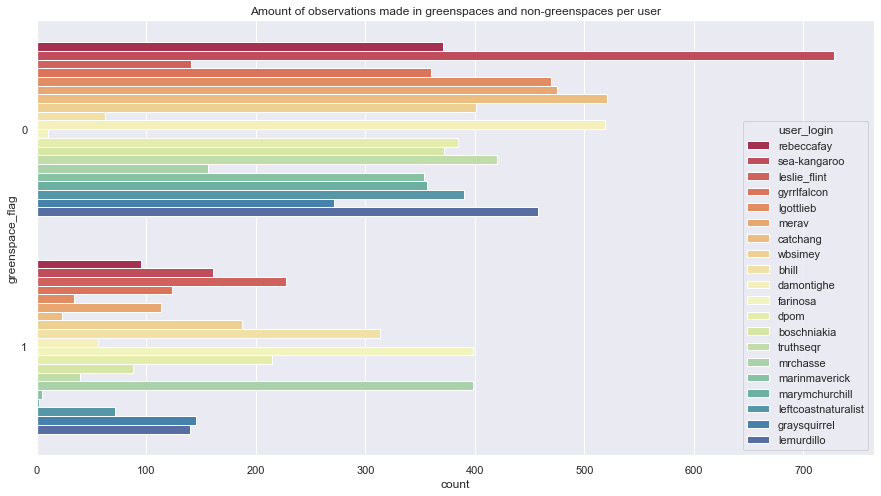

In [14]:
top_20 = ranks.head(20)
top_20_users = top_20.user_login.values.tolist()
sf_top_20 = sf_2018[sf_2018['user_login'].isin(top_20_users)]
plt.figure(figsize=(15,8))
plt.title('Amount of observations made in greenspaces and non-greenspaces per user')
ax = sns.countplot(y="greenspace_flag", hue="user_login", data=sf_top_20, palette='Spectral')

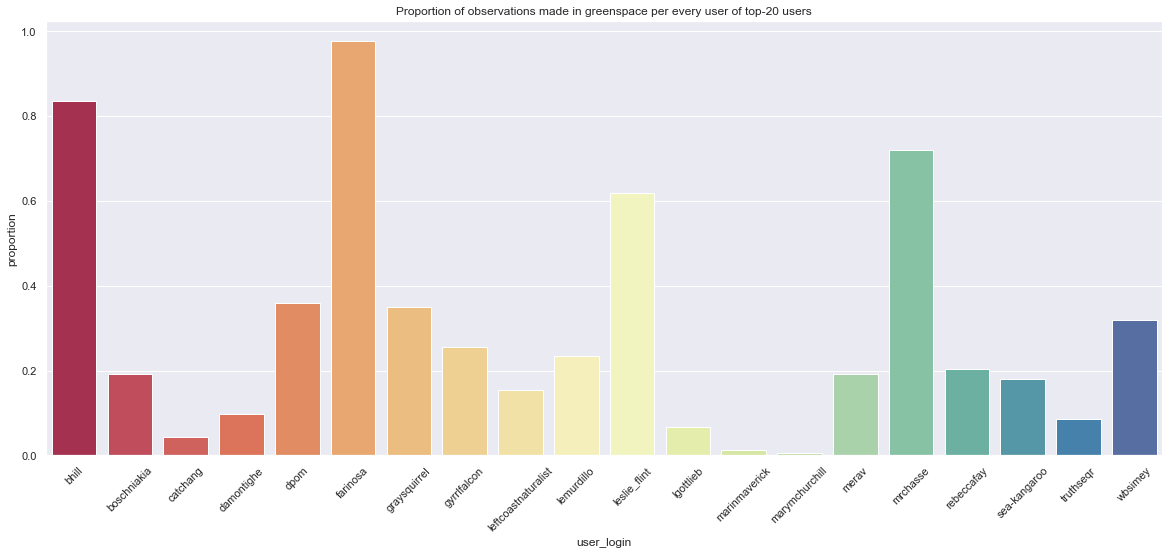

In [16]:
proportion_df = sf_top_20.groupby(['user_login', 'greenspace_flag']).size().to_frame()
proportion_df.reset_index(inplace=True)
proportion_df.rename(columns={0: 'num_observations'}, inplace=True)
proportion_df['proportion'] = 0
proportion_df.set_index(['user_login', 'greenspace_flag'], inplace=True)
for user in proportion_df.index.unique(level='user_login'):
    if (user, 1) in proportion_df.index.unique() and (user, 0) in proportion_df.index.unique():
        proportion_df.loc[user, 'proportion'] = proportion_df.loc[(user, 1), 'num_observations'] / (proportion_df.loc[(user, 1), 'num_observations'] + proportion_df.loc[(user, 0), 'num_observations'])
    elif (user, 0) not in proportion_df.index.unique(): 
        proportion_df.loc[user, 'proportion'] = 1.0
        
proportion_df['num_obs'] = 0
for user in proportion_df.index.unique(level='user_login'):
    if (user, 1) in proportion_df.index.unique() and (user, 0) in proportion_df.index.unique():
        proportion_df.loc[user, 'num_obs'] = proportion_df.loc[(user, 1), 'num_observations'] + proportion_df.loc[(user, 0), 'num_observations']
    elif (user, 0) not in proportion_df.index.unique() and (user, 1) in proportion_df.index.unique(): 
        proportion_df.loc[user, 'num_obs'] = proportion_df.loc[(user, 1), 'num_observations']
    elif (user, 0) in proportion_df.index.unique() and (user, 1) not in proportion_df.index.unique(): 
        proportion_df.loc[user, 'num_obs'] = proportion_df.loc[(user, 0), 'num_observations']

proportion_df.reset_index(inplace=True)
new_df = proportion_df.drop(columns=['greenspace_flag', 'num_observations'])
new_df.drop_duplicates(inplace=True)
plt.figure(figsize=(20,8))
plt.title('Proportion of observations made in greenspace per every user of top-20 users')
plt.xticks(rotation=45)
ax = sns.barplot(x="user_login", y="proportion", data=new_df, palette='Spectral')

In [18]:
all_proportions_18 = sf_2018.groupby(['user_login', 'greenspace_flag']).size().to_frame()
all_proportions_18.reset_index(inplace=True)
all_proportions_18.rename(columns={0: 'num_observations'}, inplace=True)
all_proportions_18['proportion'] = 0
all_proportions_18.set_index(['user_login', 'greenspace_flag'], inplace=True)

for user in all_proportions_18.index.unique(level='user_login'):
    if (user, 1) in all_proportions_18.index.unique() and (user, 0) in all_proportions_18.index.unique():
        all_proportions_18.loc[user, 'proportion'] = all_proportions_18.loc[(user, 1), 'num_observations'] / (all_proportions_18.loc[(user, 1), 'num_observations'] + all_proportions_18.loc[(user, 0), 'num_observations'])
    elif (user, 0) not in all_proportions_18.index.unique(): 
        all_proportions_18.loc[user, 'proportion'] = 1.0
        
all_proportions_18.head()

,,num_observations,proportion
user_login,greenspace_flag,,
_claytonw,0,2,0.0
a-azarchs,0,1,0.0
a13xandre,0,1,0.0
a2nnxeri,0,3,0.0
a3d3vyth,0,1,0.0


In [20]:
all_proportions_18.reset_index(inplace=True)
new_proportions_18 = all_proportions_18.drop(columns=['greenspace_flag', 'num_observations'])
new_proportions_18.drop_duplicates(inplace=True)
new_proportions_18.head()

,user_login,proportion
0,_claytonw,0.0
1,a-azarchs,0.0
2,a13xandre,0.0
3,a2nnxeri,0.0
4,a3d3vyth,0.0


In [25]:
new_proportions_18.sort_values(by='proportion', inplace=True, ascending=False)
new_proportions_18.head()

,user_login,proportion
2186,zygy,1.0
1454,mmariec,1.0
403,cie,1.0
399,christophervazquezgarcia,1.0
397,christophe27,1.0


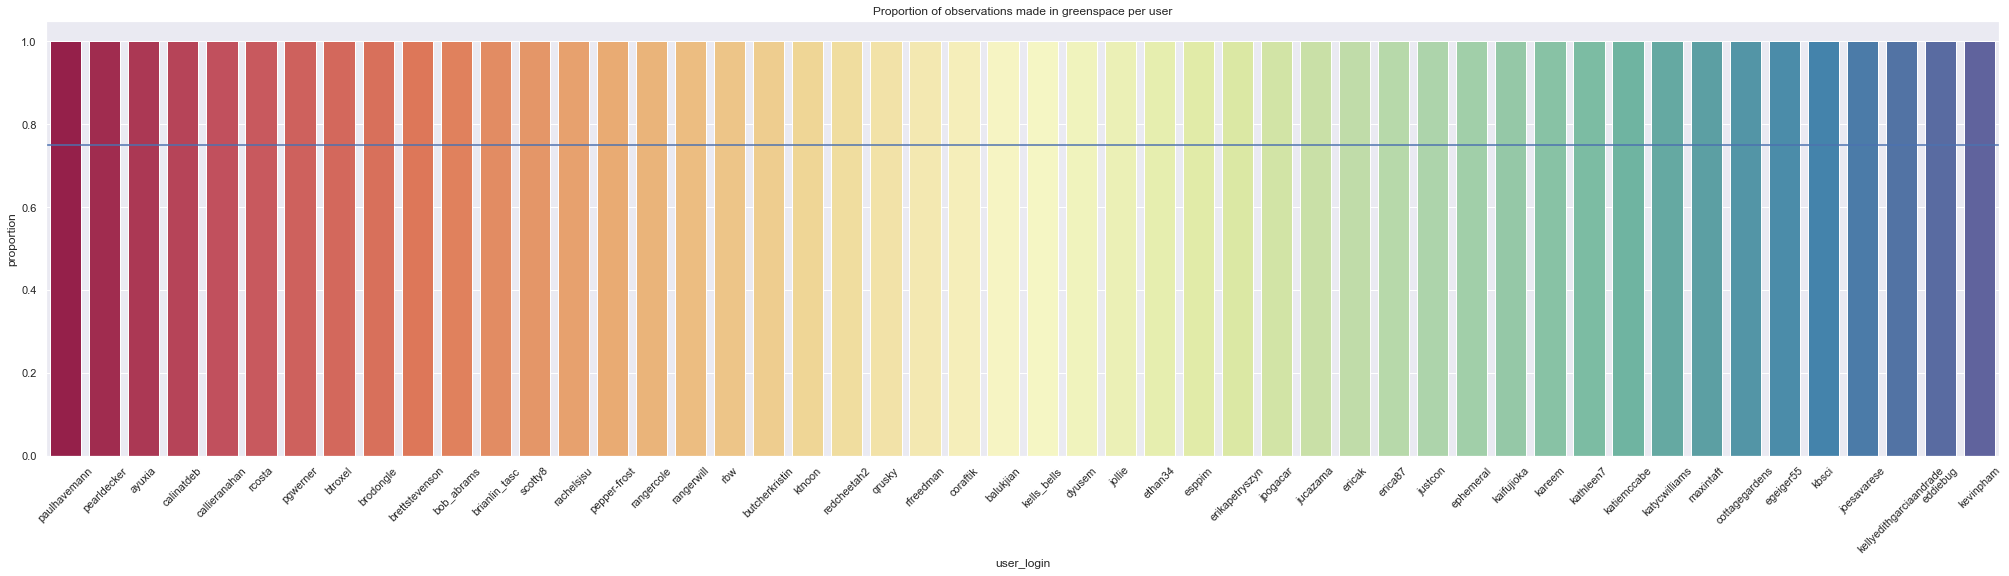

In [27]:
plt.figure(figsize=(35, 8))
plt.title('Proportion of observations made in greenspace per user')
plt.xticks(rotation=45)
ax = sns.barplot(x="user_login", y="proportion", data=new_proportions_18.iloc[100:150], palette='Spectral')
ax.axhline(0.75)

Hier sind wohl ganz viele Observations ausschließlich in greenspaces gemacht worden. Das genauer untersuchen!

### 2019:

In [29]:
sf_19 = sf_data[sf_data.year == 2019]
all_proportions_19 = sf_19.groupby(['user_login', 'greenspace_flag']).size().to_frame()
all_proportions_19.reset_index(inplace=True)
all_proportions_19.rename(columns={0: 'num_observations'}, inplace=True)
all_proportions_19['proportion'] = 0
all_proportions_19.set_index(['user_login', 'greenspace_flag'], inplace=True)

for user in all_proportions_19.index.unique(level='user_login'):
    if (user, 1) in all_proportions_19.index.unique() and (user, 0) in all_proportions_19.index.unique():
        all_proportions_19.loc[user, 'proportion'] = all_proportions_19.loc[(user, 1), 'num_observations'] / (all_proportions_19.loc[(user, 1), 'num_observations'] + all_proportions_19.loc[(user, 0), 'num_observations'])
    elif (user, 0) not in all_proportions_19.index.unique(): 
        all_proportions_19.loc[user, 'proportion'] = 1.0
        
all_proportions_19.head()

,,num_observations,proportion
user_login,greenspace_flag,,
a3d3vyth,1,4,1.000000
a_moulton1,1,1,1.000000
a_nubbs,0,1,0.000000
aaldrid2,0,15,0.000000
aaq,0,31,0.114286


In [30]:
all_proportions_19.reset_index(inplace=True)
new_proportions_19 = all_proportions_19.drop(columns=['greenspace_flag', 'num_observations'])
new_proportions_19.drop_duplicates(inplace=True)
new_proportions_19.head()

,user_login,proportion
0,a3d3vyth,1.000000
1,a_moulton1,1.000000
2,a_nubbs,0.000000
3,aaldrid2,0.000000
4,aaq,0.114286


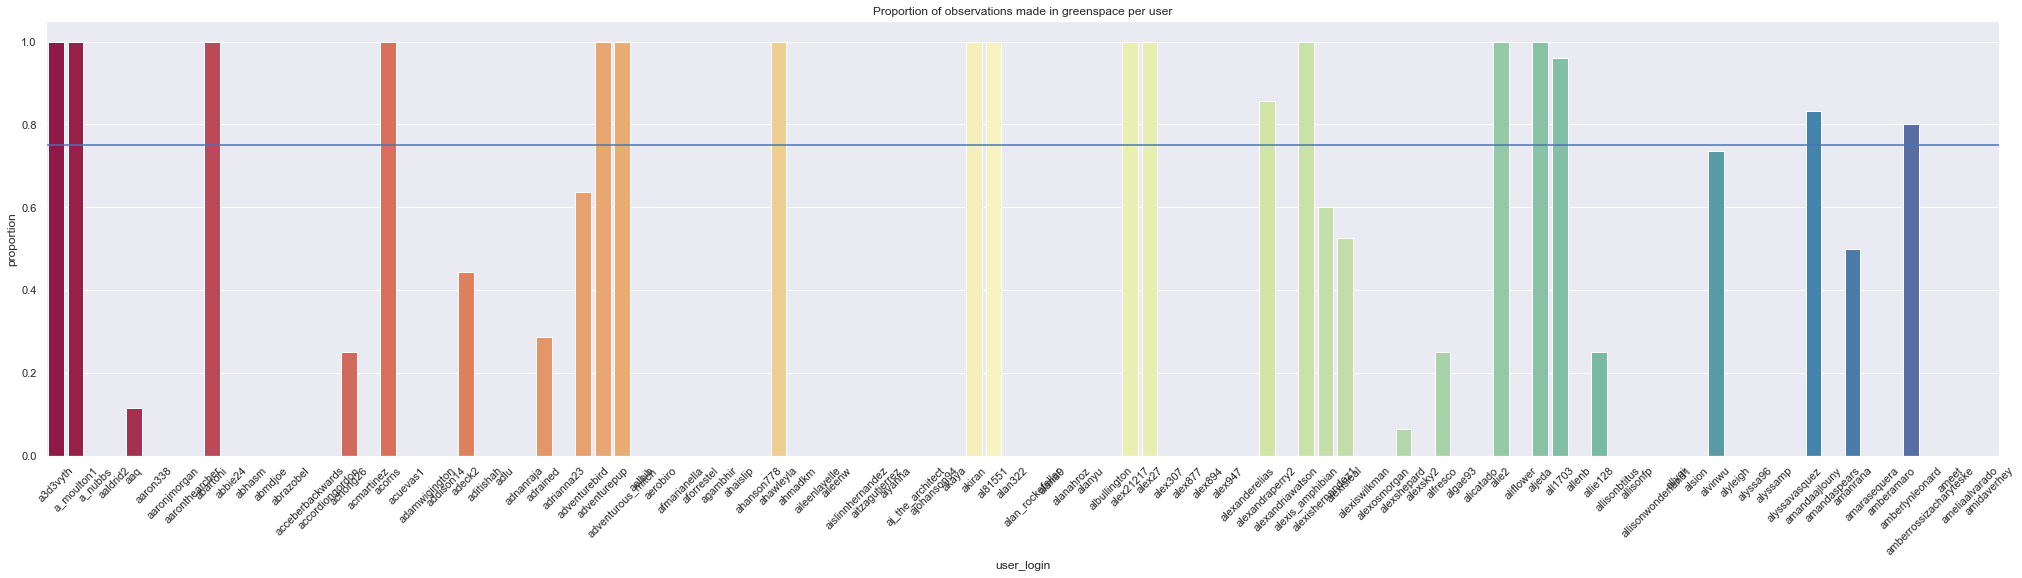

In [31]:
plt.figure(figsize=(35, 8))
plt.title('Proportion of observations made in greenspace per user')
plt.xticks(rotation=45)
ax = sns.barplot(x="user_login", y="proportion", data=new_proportions_19.head(100), palette='Spectral')
ax.axhline(0.75)

### 2020:

In [33]:
sf_20 = sf_data[sf_data.year == 2020]
all_proportions_20 = sf_20.groupby(['user_login', 'greenspace_flag']).size().to_frame()
all_proportions_20.reset_index(inplace=True)
all_proportions_20.rename(columns={0: 'num_observations'}, inplace=True)
all_proportions_20['proportion'] = 0
all_proportions_20.set_index(['user_login', 'greenspace_flag'], inplace=True)

for user in all_proportions_20.index.unique(level='user_login'):
    if (user, 1) in all_proportions_20.index.unique() and (user, 0) in all_proportions_20.index.unique():
        all_proportions_20.loc[user, 'proportion'] = all_proportions_20.loc[(user, 1), 'num_observations'] / (all_proportions_20.loc[(user, 1), 'num_observations'] + all_proportions_20.loc[(user, 0), 'num_observations'])
    elif (user, 0) not in all_proportions_20.index.unique(): 
        all_proportions_20.loc[user, 'proportion'] = 1.0
        
all_proportions_20.head()

,,num_observations,proportion
user_login,greenspace_flag,,
_flob_,0,1,0.0
aangu,0,1,0.0
aanya,0,6,0.0
abbyt,0,1,0.0
abersbird,0,2,0.0


In [34]:
all_proportions_20.reset_index(inplace=True)
new_proportions_20 = all_proportions_20.drop(columns=['greenspace_flag', 'num_observations'])
new_proportions_20.drop_duplicates(inplace=True)
new_proportions_20.head()

,user_login,proportion
0,_flob_,0.0
1,aangu,0.0
2,aanya,0.0
3,abbyt,0.0
4,abersbird,0.0


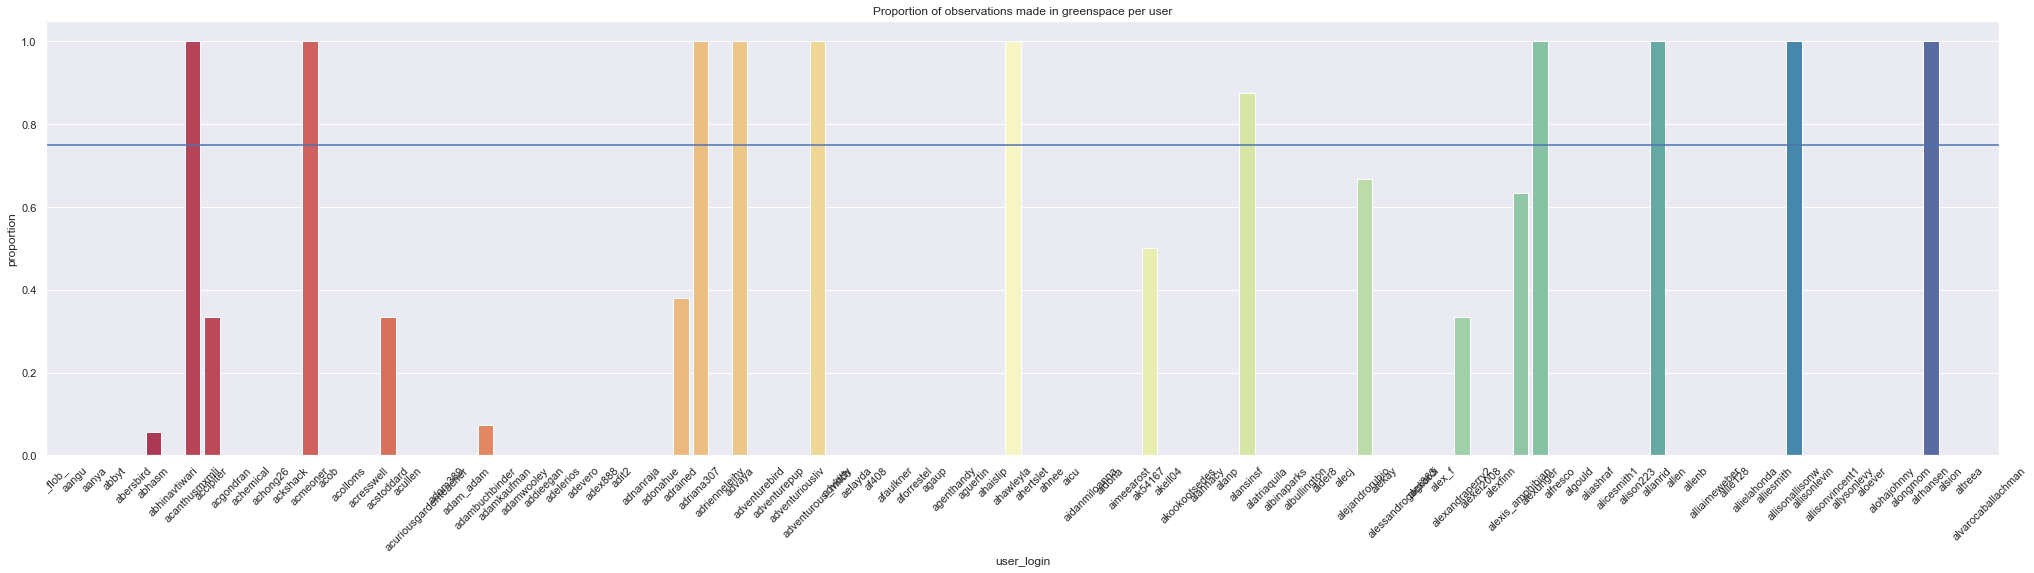

In [35]:
plt.figure(figsize=(35, 8))
plt.title('Proportion of observations made in greenspace per user')
plt.xticks(rotation=45)
ax = sns.barplot(x="user_login", y="proportion", data=new_proportions_20.head(100), palette='Spectral')
ax.axhline(0.75)

### amount of users whose amount of proportion is above 75%

In [36]:
len(new_proportions_20[new_proportions_20.proportion > 0.75]), len(new_proportions_19[new_proportions_19.proportion > 0.75]), len(new_proportions_18[new_proportions_18.proportion > 0.75])

(299, 401, 448)

In [37]:
proportions = [len(new_proportions_18[new_proportions_18.proportion > 0.75]), len(new_proportions_19[new_proportions_19.proportion > 0.75]), len(new_proportions_20[new_proportions_20.proportion > 0.75])]
years = [2018, 2019, 2020]

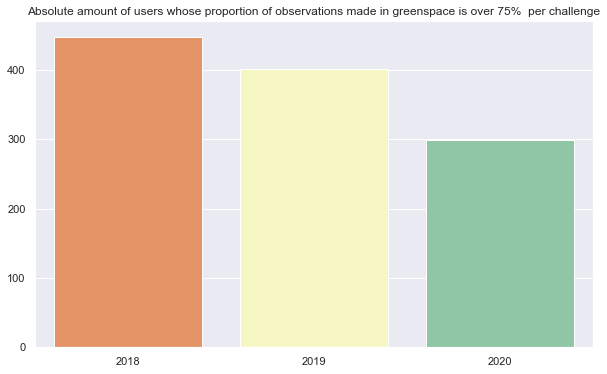

In [38]:
plt.figure(figsize=(10, 6))
plt.title('Absolute amount of users whose proportion of observations made in greenspace is over 75%  per challenge')
ax = sns.barplot(x=years, y=proportions, palette='Spectral')

In [39]:
proportions = [len(new_proportions_18[new_proportions_18.proportion > 0.75])/len(new_proportions_18), 
               len(new_proportions_19[new_proportions_19.proportion > 0.75])/len(new_proportions_19), 
               len(new_proportions_20[new_proportions_20.proportion > 0.75])/len(new_proportions_20)]

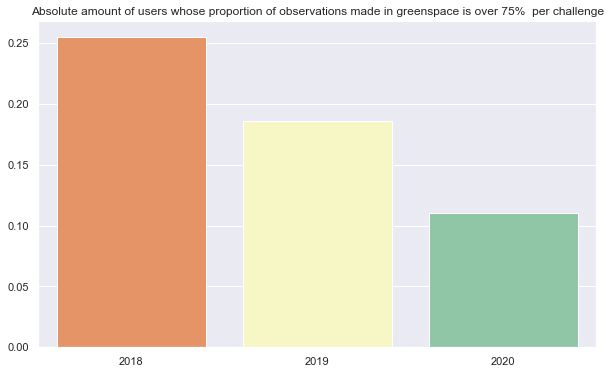

In [40]:
## also relatively compared to the total amount of users in this year 
plt.figure(figsize=(10, 6))
plt.title('Absolute amount of users whose proportion of observations made in greenspace is over 75%  per challenge')
ax = sns.barplot(x=years, y=proportions, palette='Spectral')